# K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a classification algorithm that assigns a class label to a data point based on the class labels of its k nearest neighbors in the training set. It is a non-parametric algorithm, which means that it does not make any assumptions about the distribution of the data.

The KNN algorithm works as follows:

- Choose a value of k (the number of nearest neighbors to consider).
- For each data point in the test set, compute its distance to all data points in the training set.
- Select the k nearest neighbors based on their distances.
- Assign the class label that appears most frequently among the k nearest neighbors to the test point.

The distance between two data points can be computed using a distance metric such as Euclidean distance, Manhattan distance, or Minkowski distance. The choice of distance metric depends on the nature of the data and the problem at hand.

One important aspect of the KNN algorithm is the choice of the value of k. A small value of k will result in a more flexible decision boundary that can capture complex patterns in the data, but may also lead to overfitting. A large value of k will result in a smoother decision boundary that may not capture fine details in the data, but is less prone to overfitting. The value of k is typically chosen using cross-validation.

KNN can also be used for regression tasks, where the goal is to predict a continuous value instead of a class label. In this case, the predicted value for a test point is the average of the values of its k nearest neighbors in the training set.

## Code 
Here is an implementation of the KNN classifier in Python:

In [ ]:
from collections import Counter
import numpy as np

class KNN:
    """
    K-Nearest Neighbors分类器实现
    K-Nearest Neighbors Classifier Implementation
    """
    def __init__(self, k=3, distance='euclidean', p=2):
        """
        初始化KNN分类器
        Initialize KNN classifier
        
        Args:
            k (int): 最近邻的数量 / Number of nearest neighbors
            distance (str): 距离度量方法 / Distance metric method
            p (int): Minkowski距离的参数p / Parameter p for Minkowski distance
        """
        self.k = k
        self.distance = distance
        self.p = p  # 用于Minkowski距离的参数p / Parameter p for Minkowski distance
        
    def fit(self, X_train, y_train):
        """
        训练KNN分类器（实际上只是存储训练数据）
        Train KNN classifier (actually just store training data)
        
        Args:
            X_train: 训练特征 / Training features
            y_train: 训练标签 / Training labels
        """
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        """
        对测试数据进行预测
        Predict labels for test data
        
        Args:
            X_test: 测试特征 / Test features
            
        Returns:
            y_pred: 预测标签 / Predicted labels
        """
        y_pred = []
        for x in X_test:  # 遍历每个测试样本 / Iterate through each test sample
            # 计算测试点到所有训练点的距离
            # Compute distances between the test point and all training points
            if self.distance == 'euclidean':
                # 欧几里得距离: sqrt(sum((x_i - x_j)^2)) L2
                # Euclidean distance: sqrt(sum((x_i - x_j)^2))
                distances = np.linalg.norm(self.X_train - x, axis=1)
            elif self.distance == 'manhattan':
                # 曼哈顿距离: sum(|x_i - x_j|). L1
                # Manhattan distance: sum(|x_i - x_j|)
                distances = np.sum(np.abs(self.X_train - x), axis=1)
            elif self.distance == 'minkowski':
                # 闵可夫斯基距离: (sum(|x_i - x_j|^p))^(1/p) Lp
                # Minkowski distance: (sum(|x_i - x_j|^p))^(1/p)
                distances = np.power(np.sum(np.power(np.abs(self.X_train - x), self.p), axis=1), 1/self.p)
            else:
                raise ValueError(f"Unsupported distance metric: {self.distance}")
                
            # 选择k个最近邻
            # Select the k nearest neighbors
            nearest_indices = np.argsort(distances)[:self.k]
            nearest_labels = self.y_train[nearest_indices]
            
            # 在k个最近邻中选择出现最频繁的类别标签
            # Assign the class label that appears most frequently among the k nearest neighbors
            label = Counter(nearest_labels).most_common(1)[0][0]
            y_pred.append(label)
        
        return np.array(y_pred)


The KNN class has two main methods: fit and predict. The fit method takes the training data as input and stores it in instance variables. The predict method takes the test data as input and computes the class labels for each test point using the KNN algorithm.

The predict method computes the distances between the test point and all training points, selects the k nearest neighbors based on the distances, and assigns the class label that appears most frequently among the k nearest neighbors to the test point.

The distance parameter allows the user to choose the distance metric to use for computing distances. The default value is euclidean, but the user can also choose manhattan or any other value p for the Minkowski distance.

### Test 

In [ ]:
# 创建自定义样本数据集
# Create custom sample dataset
print("=== 创建自定义样本数据集 / Creating Custom Sample Dataset ===")

# 设置随机种子以确保结果可重现
# Set random seed for reproducible results
np.random.seed(42)

# 生成三个类别的2D数据点
# Generate 2D data points for three classes
n_samples_per_class = 50  # 每个类别的样本数量 / Number of samples per class

# 类别0: 中心在(1,1)的正态分布
# Class 0: Normal distribution centered at (1,1)
class0_x = np.random.normal(1, 0.5, n_samples_per_class)
class0_y = np.random.normal(1, 0.5, n_samples_per_class)
class0_labels = np.zeros(n_samples_per_class, dtype=int)

# 类别1: 中心在(3,3)的正态分布
# Class 1: Normal distribution centered at (3,3)
class1_x = np.random.normal(3, 0.5, n_samples_per_class)
class1_y = np.random.normal(3, 0.5, n_samples_per_class)
class1_labels = np.ones(n_samples_per_class, dtype=int)

# 类别2: 中心在(1,3)的正态分布
# Class 2: Normal distribution centered at (1,3)
class2_x = np.random.normal(1, 0.5, n_samples_per_class)
class2_y = np.random.normal(3, 0.5, n_samples_per_class)
class2_labels = np.full(n_samples_per_class, 2, dtype=int)

# 合并所有数据
# Combine all data
X = np.column_stack([
    np.concatenate([class0_x, class1_x, class2_x]),  # x坐标 / x coordinates
    np.concatenate([class0_y, class1_y, class2_y])   # y坐标 / y coordinates
])
y = np.concatenate([class0_labels, class1_labels, class2_labels])

print(f"数据集形状 / Dataset shape: X={X.shape}, y={y.shape}")
print(f"类别分布 / Class distribution: {np.bincount(y)}")

# 分割训练集和测试集
# Split into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"训练集大小 / Training set size: {X_train.shape[0]}")
print(f"测试集大小 / Test set size: {X_test.shape[0]}")

# 测试不同距离度量方法
# Test different distance metrics
print("\n=== 测试不同距离度量方法 / Testing Different Distance Metrics ===")
distances = ['euclidean', 'manhattan', 'minkowski']
for dist in distances:
    if dist == 'minkowski':
        knn = KNN(k=5, distance=dist, p=2)  # p=2等价于欧几里得距离 / p=2 is equivalent to euclidean
    else:
        knn = KNN(k=5, distance=dist)
    
    # 训练分类器
    # Train the classifier
    knn.fit(X_train, y_train)
    
    # 对测试数据进行预测
    # Make predictions on test data
    y_pred = knn.predict(X_test)
    
    # 计算准确率
    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{dist}距离准确率 / {dist} distance accuracy: {accuracy:.4f}")

print("\n=== 详细预测结果 / Detailed Prediction Results ===")

# 使用欧几里得距离进行详细分析
# Use euclidean distance for detailed analysis
knn = KNN(k=5, distance='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# 显示前10个预测结果
# Show first 10 prediction results
print("前10个测试样本的预测结果 / First 10 test samples prediction results:")
for i in range(min(10, len(X_test))):
    print(f"样本{i+1} / Sample {i+1}: 真实标签={y_test[i]}, 预测标签={y_pred[i]} / True={y_test[i]}, Predicted={y_pred[i]}")


=== 创建自定义样本数据集 / Creating Custom Sample Dataset ===
数据集形状 / Dataset shape: X=(150, 2), y=(150,)
类别分布 / Class distribution: [50 50 50]
训练集大小 / Training set size: 105
测试集大小 / Test set size: 45

=== 测试不同距离度量方法 / Testing Different Distance Metrics ===
euclidean距离准确率 / euclidean distance accuracy: 0.9778
manhattan距离准确率 / manhattan distance accuracy: 0.9778
minkowski距离准确率 / minkowski distance accuracy: 0.9778

=== 详细预测结果 / Detailed Prediction Results ===
前10个测试样本的预测结果 / First 10 test samples prediction results:
样本1 / Sample 1: 真实标签=2, 预测标签=2 / True=2, Predicted=2
样本2 / Sample 2: 真实标签=1, 预测标签=1 / True=1, Predicted=1
样本3 / Sample 3: 真实标签=2, 预测标签=2 / True=2, Predicted=2
样本4 / Sample 4: 真实标签=1, 预测标签=1 / True=1, Predicted=1
样本5 / Sample 5: 真实标签=2, 预测标签=2 / True=2, Predicted=2
样本6 / Sample 6: 真实标签=2, 预测标签=2 / True=2, Predicted=2
样本7 / Sample 7: 真实标签=1, 预测标签=1 / True=1, Predicted=1
样本8 / Sample 8: 真实标签=1, 预测标签=1 / True=1, Predicted=1
样本9 / Sample 9: 真实标签=0, 预测标签=0 / True=0, Predicted=0
样本10 / Sampl

C:\Users\13187\AppData\Local\Temp\ipykernel_27656\423425338.py:83: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  plt.tight_layout()
C:\Users\13187\AppData\Local\Temp\ipykernel_27656\423425338.py:83: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from current font.
  plt.tight_layout()
C:\Users\13187\AppData\Local\Temp\ipykernel_27656\423425338.py:83: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  plt.tight_layout()
C:\Users\13187\AppData\Local\Temp\ipykernel_27656\423425338.py:83: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  plt.tight_layout()
C:\Users\13187\AppData\Local\Temp\ipykernel_27656\423425338.py:83: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.tight_layout()
C:\Users\13187\AppData\Local\Temp\ipykernel_27656\423425338.py:83: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing fr

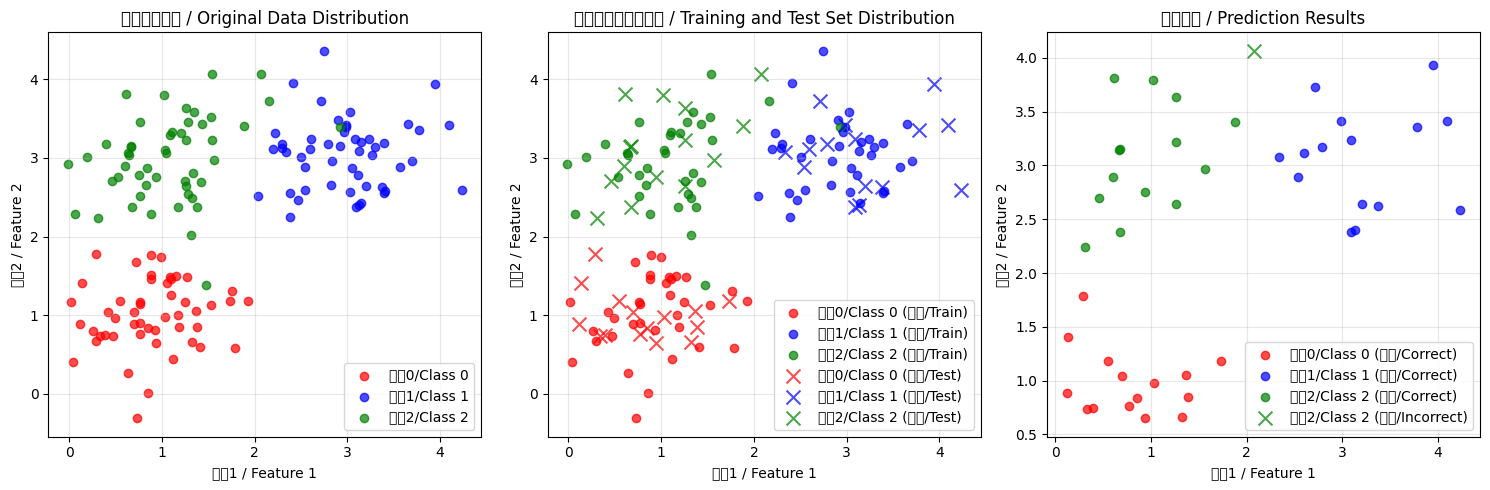


=== 最终结果统计 / Final Results Statistics ===
总体准确率 / Overall accuracy: 0.9778
正确预测数量 / Correct predictions: 44
错误预测数量 / Incorrect predictions: 1
总测试样本数 / Total test samples: 45


In [3]:
# 数据可视化
# Data Visualization
import matplotlib.pyplot as plt

# 创建子图
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. 原始数据分布
# 1. Original data distribution
colors = ['red', 'blue', 'green']
class_names = ['类别0/Class 0', '类别1/Class 1', '类别2/Class 2']

for i in range(3):
    mask = y == i
    axes[0].scatter(X[mask, 0], X[mask, 1], c=colors[i], label=class_names[i], alpha=0.7)

axes[0].set_title('原始数据分布 / Original Data Distribution')
axes[0].set_xlabel('特征1 / Feature 1')
axes[0].set_ylabel('特征2 / Feature 2')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. 训练集和测试集分布
# 2. Training and test set distribution
# 训练集
# Training set
for i in range(3):
    mask = y_train == i
    axes[1].scatter(X_train[mask, 0], X_train[mask, 1], c=colors[i], 
                   label=f'{class_names[i]} (训练/Train)', alpha=0.7, marker='o')

# 测试集
# Test set
for i in range(3):
    mask = y_test == i
    axes[1].scatter(X_test[mask, 0], X_test[mask, 1], c=colors[i], 
                   label=f'{class_names[i]} (测试/Test)', alpha=0.7, marker='x', s=100)

axes[1].set_title('训练集和测试集分布 / Training and Test Set Distribution')
axes[1].set_xlabel('特征1 / Feature 1')
axes[1].set_ylabel('特征2 / Feature 2')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3. 预测结果可视化
# 3. Prediction results visualization
# 使用欧几里得距离进行预测
# Use euclidean distance for prediction
knn = KNN(k=5, distance='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# 正确预测的点
# Correctly predicted points
correct_mask = y_test == y_pred
# 错误预测的点
# Incorrectly predicted points
incorrect_mask = y_test != y_pred

# 绘制正确预测的点
# Plot correctly predicted points
for i in range(3):
    mask = (y_test == i) & correct_mask
    if np.any(mask):
        axes[2].scatter(X_test[mask, 0], X_test[mask, 1], c=colors[i], 
                       label=f'{class_names[i]} (正确/Correct)', alpha=0.7, marker='o')

# 绘制错误预测的点
# Plot incorrectly predicted points
for i in range(3):
    mask = (y_test == i) & incorrect_mask
    if np.any(mask):
        axes[2].scatter(X_test[mask, 0], X_test[mask, 1], c=colors[i], 
                       label=f'{class_names[i]} (错误/Incorrect)', alpha=0.7, marker='x', s=100)

axes[2].set_title('预测结果 / Prediction Results')
axes[2].set_xlabel('特征1 / Feature 1')
axes[2].set_ylabel('特征2 / Feature 2')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 计算并显示准确率统计
# Calculate and display accuracy statistics
accuracy = accuracy_score(y_test, y_pred)
print(f"\n=== 最终结果统计 / Final Results Statistics ===")
print(f"总体准确率 / Overall accuracy: {accuracy:.4f}")
print(f"正确预测数量 / Correct predictions: {np.sum(correct_mask)}")
print(f"错误预测数量 / Incorrect predictions: {np.sum(incorrect_mask)}")
print(f"总测试样本数 / Total test samples: {len(y_test)}")


C:\Users\13187\AppData\Local\Temp\ipykernel_27656\3294109997.py:83: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  plt.tight_layout()


=== KNN算法步骤详细演示 / Detailed KNN Algorithm Steps ===
选择的测试样本 / Selected test sample: [1.25689298 2.64616527]
真实标签 / True label: 2

前5个最近邻 / Top 5 nearest neighbors:
索引/Index | 距离/Distance | 标签/Label
-----------------------------------
      85 |     0.0593 |        2
      10 |     0.1133 |        2
      49 |     0.1727 |        2
      96 |     0.1746 |        2
      82 |     0.1813 |        2

最近邻标签统计 / Nearest neighbor label counts:
标签2 / Label 2: 5次 / 5 times

预测结果 / Prediction result:
预测标签 / Predicted label: 2
真实标签 / True label: 2
预测正确 / Prediction correct: True


C:\Users\13187\AppData\Local\Temp\ipykernel_27656\3294109997.py:83: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from current font.
  plt.tight_layout()
C:\Users\13187\AppData\Local\Temp\ipykernel_27656\3294109997.py:83: UserWarning: Glyph 31639 (\N{CJK UNIFIED IDEOGRAPH-7B97}) missing from current font.
  plt.tight_layout()
C:\Users\13187\AppData\Local\Temp\ipykernel_27656\3294109997.py:83: UserWarning: Glyph 27861 (\N{CJK UNIFIED IDEOGRAPH-6CD5}) missing from current font.
  plt.tight_layout()
C:\Users\13187\AppData\Local\Temp\ipykernel_27656\3294109997.py:83: UserWarning: Glyph 28436 (\N{CJK UNIFIED IDEOGRAPH-6F14}) missing from current font.
  plt.tight_layout()
C:\Users\13187\AppData\Local\Temp\ipykernel_27656\3294109997.py:83: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.tight_layout()
C:\Users\13187\AppData\Local\Temp\ipykernel_27656\3294109997.py:83: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) miss

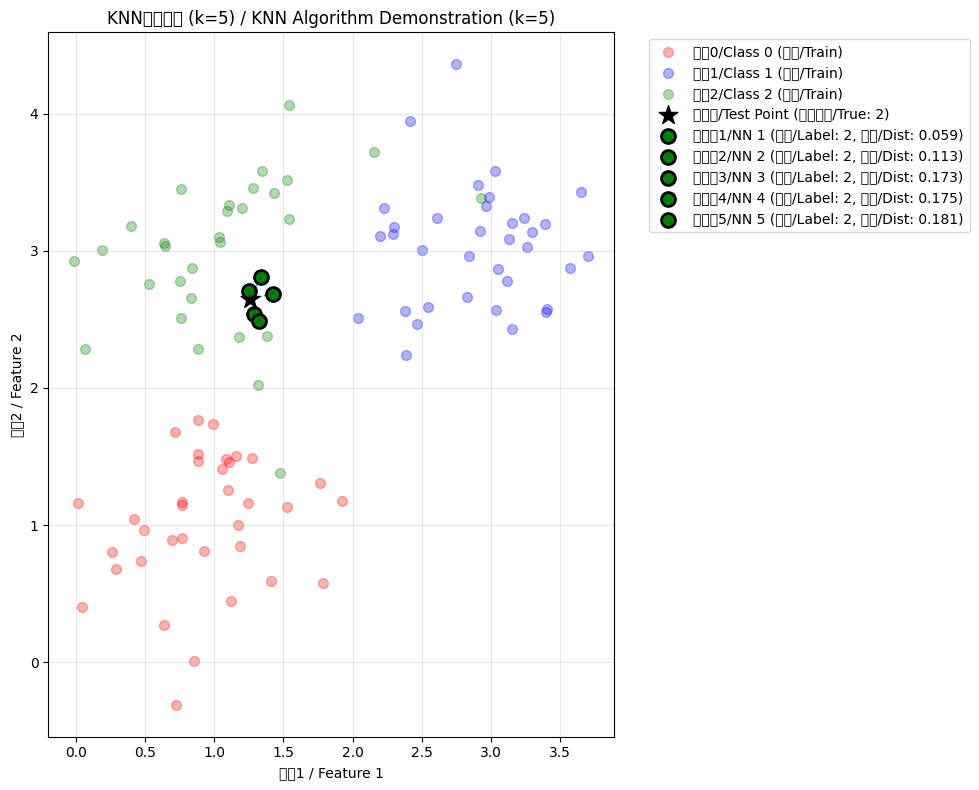

In [4]:
# KNN算法步骤详细演示
# Detailed demonstration of KNN algorithm steps
print("=== KNN算法步骤详细演示 / Detailed KNN Algorithm Steps ===")

# 选择一个测试样本进行详细分析
# Select a test sample for detailed analysis
test_sample_idx = 0  # 选择第一个测试样本 / Select first test sample
test_point = X_test[test_sample_idx]
true_label = y_test[test_sample_idx]

print(f"选择的测试样本 / Selected test sample: {test_point}")
print(f"真实标签 / True label: {true_label}")

# 计算到所有训练点的距离
# Calculate distances to all training points
distances = np.linalg.norm(X_train - test_point, axis=1)

# 找到k个最近邻
# Find k nearest neighbors
k = 5
nearest_indices = np.argsort(distances)[:k]
nearest_distances = distances[nearest_indices]
nearest_labels = y_train[nearest_indices]

print(f"\n前{k}个最近邻 / Top {k} nearest neighbors:")
print("索引/Index | 距离/Distance | 标签/Label")
print("-" * 35)
for i, (idx, dist, label) in enumerate(zip(nearest_indices, nearest_distances, nearest_labels)):
    print(f"{idx:8d} | {dist:10.4f} | {label:8d}")

# 统计最近邻中的标签分布
# Count label distribution in nearest neighbors
label_counts = Counter(nearest_labels)
print(f"\n最近邻标签统计 / Nearest neighbor label counts:")
for label, count in label_counts.most_common():
    print(f"标签{label} / Label {label}: {count}次 / {count} times")

# 预测标签
# Predicted label
predicted_label = label_counts.most_common(1)[0][0]
print(f"\n预测结果 / Prediction result:")
print(f"预测标签 / Predicted label: {predicted_label}")
print(f"真实标签 / True label: {true_label}")
print(f"预测正确 / Prediction correct: {predicted_label == true_label}")

# 可视化最近邻
# Visualize nearest neighbors
plt.figure(figsize=(10, 8))

# 绘制所有训练点
# Plot all training points
for i in range(3):
    mask = y_train == i
    plt.scatter(X_train[mask, 0], X_train[mask, 1], c=colors[i], 
               label=f'{class_names[i]} (训练/Train)', alpha=0.3, s=50)

# 绘制测试点
# Plot test point
plt.scatter(test_point[0], test_point[1], c='black', marker='*', 
           s=200, label=f'测试点/Test Point (真实标签/True: {true_label})')

# 绘制最近邻
# Plot nearest neighbors
for i, (idx, dist, label) in enumerate(zip(nearest_indices, nearest_distances, nearest_labels)):
    neighbor_point = X_train[idx]
    plt.scatter(neighbor_point[0], neighbor_point[1], c=colors[label], 
               marker='o', s=100, edgecolors='black', linewidth=2,
               label=f'最近邻{i+1}/NN {i+1} (标签/Label: {label}, 距离/Dist: {dist:.3f})')

# 绘制从测试点到最近邻的连线
# Draw lines from test point to nearest neighbors
for idx in nearest_indices:
    neighbor_point = X_train[idx]
    plt.plot([test_point[0], neighbor_point[0]], 
             [test_point[1], neighbor_point[1]], 
             'k--', alpha=0.5, linewidth=1)

plt.title(f'KNN算法演示 (k={k}) / KNN Algorithm Demonstration (k={k})')
plt.xlabel('特征1 / Feature 1')
plt.ylabel('特征2 / Feature 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


=== 不同k值对性能的影响 / Impact of Different k Values ===
k值 / k Value | 准确率 / Accuracy | 训练时间 / Training Time | 预测时间 / Prediction Time
----------------------------------------------------------------------
       1 |       0.9778 |     0.000000 |     0.000000
       3 |       1.0000 |     0.000000 |     0.000000
       5 |       0.9778 |     0.000000 |     0.000999
       7 |       1.0000 |     0.000000 |     0.000997
       9 |       1.0000 |     0.000000 |     0.000507
      11 |       0.9778 |     0.000000 |     0.001003
      15 |       0.9778 |     0.000000 |     0.000000
      20 |       0.9778 |     0.000000 |     0.000999


C:\Users\13187\AppData\Local\Temp\ipykernel_27656\3933682697.py:60: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  plt.tight_layout()
C:\Users\13187\AppData\Local\Temp\ipykernel_27656\3933682697.py:60: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6}) missing from current font.
  plt.tight_layout()
C:\Users\13187\AppData\Local\Temp\ipykernel_27656\3933682697.py:60: UserWarning: Glyph 30830 (\N{CJK UNIFIED IDEOGRAPH-786E}) missing from current font.
  plt.tight_layout()
C:\Users\13187\AppData\Local\Temp\ipykernel_27656\3933682697.py:60: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  plt.tight_layout()
C:\Users\13187\AppData\Local\Temp\ipykernel_27656\3933682697.py:60: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from current font.
  plt.tight_layout()
C:\Users\13187\AppData\Local\Temp\ipykernel_27656\3933682697.py:60: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) miss

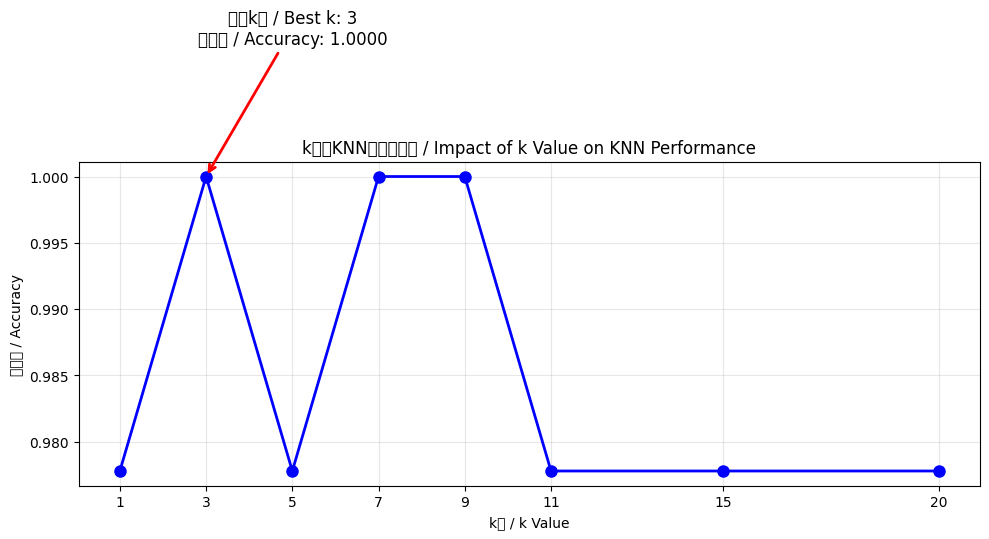


最佳k值 / Best k value: 3
最佳准确率 / Best accuracy: 1.0000

=== 总结 / Summary ===
1. KNN算法特点 / KNN Algorithm Characteristics:
   - 非参数方法，不需要训练过程 / Non-parametric method, no training process needed
   - 基于距离的懒惰学习算法 / Distance-based lazy learning algorithm
   - k值的选择对性能有重要影响 / Choice of k value significantly impacts performance
   - 计算复杂度随训练集大小线性增长 / Computational complexity grows linearly with training set size

2. 距离度量方法比较 / Distance Metric Comparison:
   - 欧几里得距离: 适用于连续特征 / Euclidean: Suitable for continuous features
   - 曼哈顿距离: 对异常值更鲁棒 / Manhattan: More robust to outliers
   - 闵可夫斯基距离: 欧几里得和曼哈顿的推广 / Minkowski: Generalization of Euclidean and Manhattan

3. 优缺点 / Pros and Cons:
   优点 / Advantages:
   - 简单直观，易于理解和实现 / Simple and intuitive, easy to understand and implement
   - 对数据分布没有假设 / No assumptions about data distribution
   - 适用于多分类问题 / Suitable for multi-class problems
   缺点 / Disadvantages:
   - 计算复杂度高，预测速度慢 / High computational complexity, slow prediction
   - 对高维数据效果差 / Poor perform

In [5]:
# 不同k值对性能的影响
# Impact of different k values on performance
print("=== 不同k值对性能的影响 / Impact of Different k Values ===")

# 测试不同的k值
# Test different k values
k_values = [1, 3, 5, 7, 9, 11, 15, 20]
accuracies = []

print("k值 / k Value | 准确率 / Accuracy | 训练时间 / Training Time | 预测时间 / Prediction Time")
print("-" * 70)

for k in k_values:
    # 创建KNN分类器
    # Create KNN classifier
    knn = KNN(k=k, distance='euclidean')
    
    # 训练时间
    # Training time
    import time
    start_time = time.time()
    knn.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # 预测时间
    # Prediction time
    start_time = time.time()
    y_pred = knn.predict(X_test)
    pred_time = time.time() - start_time
    
    # 计算准确率
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    print(f"{k:8d} | {accuracy:12.4f} | {train_time:12.6f} | {pred_time:12.6f}")

# 可视化k值与准确率的关系
# Visualize relationship between k and accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, 'bo-', linewidth=2, markersize=8)
plt.xlabel('k值 / k Value')
plt.ylabel('准确率 / Accuracy')
plt.title('k值对KNN性能的影响 / Impact of k Value on KNN Performance')
plt.grid(True, alpha=0.3)
plt.xticks(k_values)

# 标记最佳k值
# Mark best k value
best_k_idx = np.argmax(accuracies)
best_k = k_values[best_k_idx]
best_accuracy = accuracies[best_k_idx]

plt.annotate(f'最佳k值 / Best k: {best_k}\n准确率 / Accuracy: {best_accuracy:.4f}', 
             xy=(best_k, best_accuracy), 
             xytext=(best_k + 2, best_accuracy + 0.01),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=12, ha='center')

plt.tight_layout()
plt.show()

print(f"\n最佳k值 / Best k value: {best_k}")
print(f"最佳准确率 / Best accuracy: {best_accuracy:.4f}")

# 总结
# Summary
print("\n=== 总结 / Summary ===")
print("1. KNN算法特点 / KNN Algorithm Characteristics:")
print("   - 非参数方法，不需要训练过程 / Non-parametric method, no training process needed")
print("   - 基于距离的懒惰学习算法 / Distance-based lazy learning algorithm")
print("   - k值的选择对性能有重要影响 / Choice of k value significantly impacts performance")
print("   - 计算复杂度随训练集大小线性增长 / Computational complexity grows linearly with training set size")

print("\n2. 距离度量方法比较 / Distance Metric Comparison:")
print("   - 欧几里得距离: 适用于连续特征 / Euclidean: Suitable for continuous features")
print("   - 曼哈顿距离: 对异常值更鲁棒 / Manhattan: More robust to outliers")
print("   - 闵可夫斯基距离: 欧几里得和曼哈顿的推广 / Minkowski: Generalization of Euclidean and Manhattan")

print("\n3. 优缺点 / Pros and Cons:")
print("   优点 / Advantages:")
print("   - 简单直观，易于理解和实现 / Simple and intuitive, easy to understand and implement")
print("   - 对数据分布没有假设 / No assumptions about data distribution")
print("   - 适用于多分类问题 / Suitable for multi-class problems")
print("   缺点 / Disadvantages:")
print("   - 计算复杂度高，预测速度慢 / High computational complexity, slow prediction")
print("   - 对高维数据效果差 / Poor performance on high-dimensional data")
print("   - 对特征缩放敏感 / Sensitive to feature scaling")


In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Create a KNN classifier with k=5 and euclidean distance
knn = KNN(k=5, distance='euclidean')

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Compute the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


### Visualization 

C:\Users\13187\AppData\Local\Temp\ipykernel_27656\317199100.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter1 = ax.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], c='b', cmap='viridis', label=iris.target_names[0])
C:\Users\13187\AppData\Local\Temp\ipykernel_27656\317199100.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter2 = ax.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='g', cmap='viridis', label=iris.target_names[1])
C:\Users\13187\AppData\Local\Temp\ipykernel_27656\317199100.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter3 = ax.scatter(X_test[y_test==2, 0], X_test[y_test==2, 1], c='r', cmap='viridis', label=iris.target_names[2])
C:\Users\13187\AppData\Local\Temp\ipykernel_27656\317199100.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter4 = ax

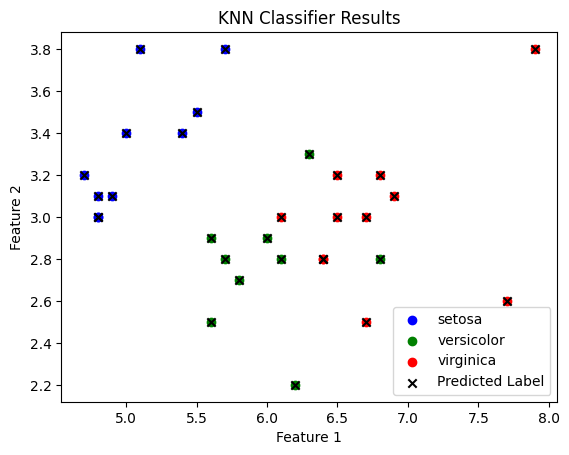

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = load_iris()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data[:, :2], iris.target, test_size=0.2, random_state=42)

# Create a KNN classifier with k=5 and euclidean distance
knn = KNN(k=5, distance='euclidean')

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Create scatter plots of the test data with colored points representing the true and predicted labels
fig, ax = plt.subplots()
scatter1 = ax.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], c='b', cmap='viridis', label=iris.target_names[0])
scatter2 = ax.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='g', cmap='viridis', label=iris.target_names[1])
scatter3 = ax.scatter(X_test[y_test==2, 0], X_test[y_test==2, 1], c='r', cmap='viridis', label=iris.target_names[2])
scatter4 = ax.scatter(X_test[:, 0], X_test[:, 1], c='k', cmap='viridis', marker='x', label='Predicted Label')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('KNN Classifier Results')
handles = [scatter1, scatter2, scatter3, scatter4]
labels = [h.get_label() for h in handles]
ax.legend(handles=handles, labels=labels)
plt.show()
